In [1]:
import keras
from matplotlib import pyplot as plt
import numpy as np
import h5py
import tensorflow as tf

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
keras.backend.image_data_format()

'channels_first'

In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
x_train = x_train / 255.
x_test = x_test / 255.

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(-1, 1, 28, 28)
x_test = x_test.reshape(-1, 1, 28, 28)

In [8]:
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Sequential

In [9]:
import keras.backend.tensorflow_backend as tfback

In [10]:
def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]


tfback._get_available_gpus = _get_available_gpus

In [60]:
lenet = Sequential()
lenet.add(Conv2D(6, kernel_size=3, strides=1, padding='same', input_shape=(1, 28, 28), activation="relu", \
                name='conv1', data_format="channels_first"))

lenet.add(MaxPool2D(pool_size=2, strides=2, name='pool1', data_format='channels_first'))

lenet.add(Conv2D(16, kernel_size=5, strides=1, padding='valid', activation="relu", \
                 name='conv2', data_format="channels_first"))

lenet.add(MaxPool2D(pool_size=2, strides=2, name='pool2', data_format="channels_first"))
lenet.add(Flatten(name='flatten', data_format="channels_last"))
lenet.add(Dense(120, activation="relu", name='fc1'))
lenet.add(Dense(84, activation="relu", name='fc2'))
lenet.add(Dense(10, activation='softmax', name='softmax'))

In [61]:
lenet.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 6, 28, 28)         60        
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 6, 14, 14)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 10, 10)        2416      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 16, 5, 5)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 120)               48120     
_________________________________________________________________
fc2 (Dense)                  (None, 84)               

In [62]:
lenet.load_weights("LeNet_NCHW.h5")

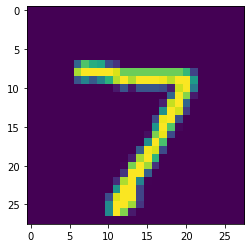

In [63]:
plt.imshow(x_test[0][0])

In [64]:
# with open("MNIST_in_7.dat","w") as f:
#     for i in x_test[0]:
#         for j in i:
#             f.write(str(j[0])+"\n")

In [65]:
image_7 = np.expand_dims(x_test[0], axis=0)
predictions = lenet.predict(image_7)

In [66]:
predictions

array([[6.7335994e-12, 5.8884730e-06, 8.9369498e-09, 2.5387008e-03,
        1.0296408e-03, 2.3865884e-02, 1.4134841e-08, 1.9547938e-01,
        5.8167940e-04, 7.7649879e-01]], dtype=float32)

In [67]:
from keras.models import Model

In [68]:
m_flatten_in = Model(inputs=lenet.input, outputs=lenet.get_layer('pool2').output)
Y_flatten_in = m_flatten_in.predict(image_7)
print(Y_flatten_in.shape)

(1, 16, 5, 5)


In [69]:
with open("flatten_in.dat","w") as f:
    for i in Y_flatten_in[0]:
        for j in i:
            for k in j:
                f.write(str(k)+"\n")

In [70]:
m_flatten_out = Model(inputs=lenet.input, outputs=lenet.get_layer('flatten').output)
Y_flatten_out = m_flatten_out.predict(image_7)
print(Y_flatten_out.shape)

(1, 400)


In [71]:
with open("flatten_out.dat","w") as f:
    for i in Y_flatten_out[0]:
        f.write(str(i)+"\n")

In [72]:
Y_flatten_in

array([[[[ 1.7865602 ,  2.5148878 ,  2.1796637 ,  1.8403363 ,
           2.4672284 ],
         [ 0.9985356 ,  4.4591503 ,  4.929274  ,  3.7278945 ,
           5.3132663 ],
         [ 0.        ,  0.        ,  0.        ,  0.2600601 ,
           4.2207923 ],
         [ 0.07208432,  0.04037521,  0.        ,  3.288526  ,
           3.5304601 ],
         [ 0.09727542,  0.        ,  0.9724573 ,  4.0071497 ,
           1.7650177 ]],

        [[ 2.2471187 ,  3.3369868 ,  0.        ,  0.72320473,
           0.3509038 ],
         [ 0.        ,  2.7098625 ,  0.9265256 ,  3.096881  ,
           6.0835366 ],
         [ 0.        ,  0.        ,  0.        ,  2.74444   ,
           4.955316  ],
         [ 0.        ,  0.        ,  0.        ,  2.60343   ,
           0.2543174 ],
         [ 0.        ,  0.        ,  2.6642344 ,  1.45313   ,
           0.        ]],

        [[ 0.        ,  0.        ,  0.        ,  0.        ,
           0.        ],
         [ 4.735078  ,  6.015937  ,  5.8737435 ,  

In [73]:
Y_flatten_out

array([[ 1.7865602 ,  2.5148878 ,  2.1796637 ,  1.8403363 ,  2.4672284 ,
         0.9985356 ,  4.4591503 ,  4.929274  ,  3.7278945 ,  5.3132663 ,
         0.        ,  0.        ,  0.        ,  0.2600601 ,  4.2207923 ,
         0.07208432,  0.04037521,  0.        ,  3.288526  ,  3.5304601 ,
         0.09727542,  0.        ,  0.9724573 ,  4.0071497 ,  1.7650177 ,
         2.2471187 ,  3.3369868 ,  0.        ,  0.72320473,  0.3509038 ,
         0.        ,  2.7098625 ,  0.9265256 ,  3.096881  ,  6.0835366 ,
         0.        ,  0.        ,  0.        ,  2.74444   ,  4.955316  ,
         0.        ,  0.        ,  0.        ,  2.60343   ,  0.2543174 ,
         0.        ,  0.        ,  2.6642344 ,  1.45313   ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         4.735078  ,  6.015937  ,  5.8737435 ,  0.        ,  0.        ,
         2.7108808 ,  5.0346847 ,  4.6382003 ,  0.8768898 ,  0.617156  ,
         0.72823894,  0.9417963 ,  0.        ,  0. 